**Juan Esteban Floyd**
**y**
**Juan David Aycardi** 

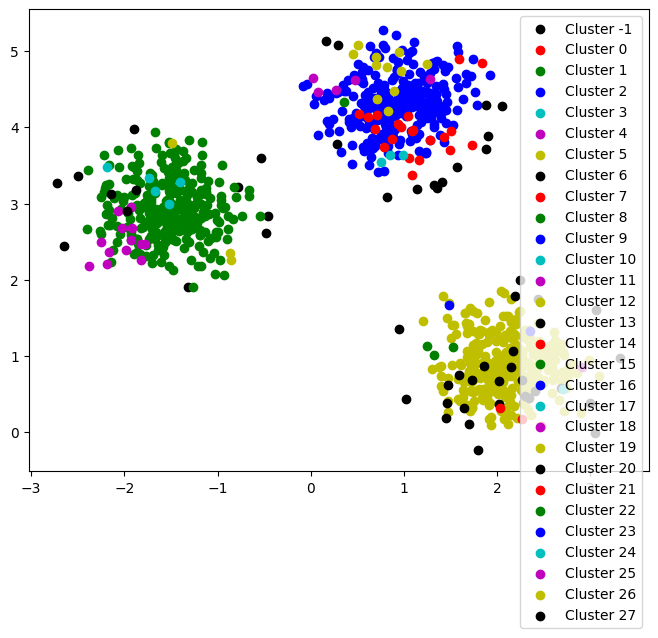

In [3]:
import numpy as np
from scipy.spatial.distance import cdist, pdist, squareform
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Definir las funciones necesarias para DBSCAN

def calcular_distancias(X):
    return squareform(pdist(X))

def encontrar_vecinos(distancias, i, eps):
    return np.where(distancias[i] <= eps)[0]

def expandir_cluster(X, etiquetas, i, vecinos, identificador_cluster, eps, min_muestras, distancias):
    etiquetas[i] = identificador_cluster
    j = 0
    while j < len(vecinos):
        vecino = vecinos[j]
        if etiquetas[vecino] == -1:
            etiquetas[vecino] = identificador_cluster
        elif etiquetas[vecino] == 0:
            etiquetas[vecino] = identificador_cluster
            nuevos_vecinos = encontrar_vecinos(distancias, vecino, eps)
            if len(nuevos_vecinos) >= min_muestras:
                vecinos = np.union1d(vecinos, nuevos_vecinos)
        j += 1

def dbscan(X, eps=0.5, min_muestras=5):
    distancias = calcular_distancias(X)
    etiquetas = np.zeros(X.shape[0], dtype=int)
    identificador_cluster = 0

    for i in range(X.shape[0]):
        if etiquetas[i] == 0:
            vecinos = encontrar_vecinos(distancias, i, eps)
            if len(vecinos) < min_muestras:
                etiquetas[i] = -1
            else:
                identificador_cluster += 1
                expandir_cluster(X, etiquetas, i, vecinos, identificador_cluster, eps, min_muestras, distancias)

    return etiquetas


# Generar datos de ejemplo
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0, cluster_std=0.40)

# Ejecutar DBSCAN en los datos de ejemplo
etiquetas = dbscan(X, eps=0.3, min_muestras=10)

# Visualizar los resultados
fig, ax = plt.subplots(figsize=(8, 6))
colores = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(-1, np.max(etiquetas) + 1):
    color = colores[i % len(colores)]
    mascara = etiquetas == i
    ax.scatter(X[mascara, 0], X[mascara, 1], c=color, label=f'Cluster {i}')
ax.legend()
plt.show()